In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('economy.csv')
data

,Sector,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Production,162716,177061,190474,206417,218157,235777,252968,271765,290199,...,292166,289314,278660,288662,298370,308201,268864,311809,369900,387141
1,Compensation of employees,26786,29300,33418,37060,40571,43242,46496,53236,58388,...,62726,61090,62287,62680,64947,66769,63888,68762,71983,76071
2,Taxes on production and imports,11426,12948,14578,15470,17335,18455,19383,21001,21680,...,28728,29137,30899,31221,31911,32270,27772,31408,39453,38388
3,Taxes on products,10817,12124,13733,14537,16186,17292,18420,20060,20661,...,22717,22604,24393,24576,25871,26321,22261,25201,32969,31762
4,Other taxes on production,609,824,845,933,1149,1163,963,941,1019,...,6011,6533,6506,6645,6040,5949,5511,6207,6484,6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"of which: Mixed income, gross",27964,30684,33511,36377,37863,39035,42483,45122,50162,...,38843,39078,37470,40271,37458,42163,36710,44150,47121,51070
67,"National income, gross",93592,101983,112836,122687,130446,137509,147814,159814,173101,...,175730,174015,172476,175296,177262,182466,165847,183257,205137,218152
68,"Disposable income/Adjusted disposable income, ...",95828,104082,114760,124539,131798,138874,149078,160598,174007,...,174945,173408,171920,175119,176830,182919,166113,183162,205496,217878
69,"Saving, gross",16314,17073,19617,20670,21006,23168,23173,24562,27751,...,17772,17527,16958,16481,16041,17422,8873,17029,19144,19686


In [3]:
# Compute the ratios and store in a dictionary

ratios = {
    "Intermediate_Consumption_to_GDP": ("Intermediate consumption", "Production"),
    "Gross_Capital_Formation_to_GDP": ("Gross capital formation", "Production"),
    "Net_Domestic_Product_to_GDP": ("Net domestic product", "Production"),
    "Disposable_Income_to_GDP": ("Disposable income/Adjusted disposable income, gross", "Production"),
    "Saving_to_GDP": ("Saving, gross", "Production"),
    "Compensation_of_Employees_to_GDP": ("Compensation of employees", "Production"),
    "Taxes_to_GDP": ("Taxes on production and imports", "Production"),
    "Subsidies_to_GDP": ("Subsidies", "Production"),
    "Gross_Fixed_Capital_Formation_to_Gross_Capital_Formation": ("Gross fixed capital formation", "Gross capital formation"),
}

ratio_results = {}

for ratio_name, (numerator, denominator) in ratios.items():
    if numerator in data['Sector'].values and denominator in data['Sector'].values:
        # Extract numerator and denominator rows
        numerator_row = data.loc[data['Sector'] == numerator].iloc[0, 1:]  # Skip 'Sector' column
        denominator_row = data.loc[data['Sector'] == denominator].iloc[0, 1:]  # Skip 'Sector' column
        
        # Compute the ratio
        ratio_results[ratio_name] = numerator_row / denominator_row

# Validate all computed ratiosValueError: Length mismatch in Intermediate_Consumption_to_GDP: Expected 28, got 29
for key, value in ratio_results.items():
    # Ensure values are 1D arrays
    if isinstance(value, np.ndarray) and value.ndim > 1:
        ratio_results[key] = value.flatten()
    # Check length consistency with the number of years (columns in data, excluding 'Sector')
    if len(value) != len(data.columns) - 1:  # Subtract 1 for the 'Sector' column
        raise ValueError(f"Length mismatch in {key}: Expected {len(data.columns) - 1}, got {len(value)}")

# Create a DataFrame for the ratios
ratios_df = pd.DataFrame(ratio_results).T  # Transpose to make ratios the rows
ratios_df.columns = data.columns[1:]  # Match column names with years (exclude 'Sector')

# Add the ratio names as a new column for identification
ratios_df['Sector'] = ratios_df.index

# Reset the index of the ratios DataFrame for concatenation
ratios_df.reset_index(drop=True, inplace=True)

# Combine the original data with the computed ratios
data = pd.concat([data, ratios_df], ignore_index=True)

# Display the final DataFrame
data


,Sector,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Production,162716,177061,190474,206417,218157,235777,252968,271765,290199,...,292166,289314,278660,288662,298370,308201,268864,311809,369900,387141
1,Compensation of employees,26786,29300,33418,37060,40571,43242,46496,53236,58388,...,62726,61090,62287,62680,64947,66769,63888,68762,71983,76071
2,Taxes on production and imports,11426,12948,14578,15470,17335,18455,19383,21001,21680,...,28728,29137,30899,31221,31911,32270,27772,31408,39453,38388
3,Taxes on products,10817,12124,13733,14537,16186,17292,18420,20060,20661,...,22717,22604,24393,24576,25871,26321,22261,25201,32969,31762
4,Other taxes on production,609,824,845,933,1149,1163,963,941,1019,...,6011,6533,6506,6645,6040,5949,5511,6207,6484,6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Saving_to_GDP,0.100261,0.096424,0.10299,0.100137,0.096288,0.098262,0.091604,0.09038,0.095627,...,0.060828,0.060581,0.060856,0.057094,0.053762,0.056528,0.033002,0.054614,0.051755,0.05085
76,Compensation_of_Employees_to_GDP,0.164618,0.16548,0.175447,0.179539,0.185972,0.183402,0.183802,0.19589,0.2012,...,0.214693,0.211155,0.223523,0.21714,0.217673,0.216641,0.237622,0.220526,0.194601,0.196494
77,Taxes_to_GDP,0.070221,0.073127,0.076535,0.074945,0.079461,0.078273,0.076622,0.077276,0.074707,...,0.098328,0.100711,0.110884,0.108158,0.106951,0.104704,0.103294,0.100728,0.106659,0.099158
78,Subsidies_to_GDP,0.017202,0.01604,0.015477,0.01513,0.013261,0.011977,0.00897,0.011109,0.010924,...,0.017593,0.017382,0.017548,0.017238,0.0159,0.016856,0.033348,0.036824,0.039089,0.017955


We have to split the dataset in smaller chucks based on the sectors of currency movement. The categories are the following:

In [4]:
# Define the categories
categories = {
    "Production and Investment": [
        'Gross domestic product', 
        'Net domestic product', 
        'Gross capital formation', 
        'Gross fixed capital formation', 
        'Changes in inventories', 
        'Acquisitions less disposals of valuables', 
        'Acquisitions less disposals of non-financial non-produced assets', 
        'Intermediate consumption'
    ],
    "Income and Profits": [
        'Compensation of employees', 
        'Operating surplus + Mixed income, gross', 
        'of which: Mixed income, gross', 
        'Property income', 
        'Interest', 
        'Distributed Income of Corporations', 
        'Reinvested Earnings on Foreign Direct Investment', 
        'Other investment income', 
        'Rent'
    ],
    "Taxes and Subsidies": [
        'Taxes on production and imports', 
        'Taxes on products', 
        'Other taxes on production', 
        'Subsidies', 
        'Subsidies on products', 
        'Other subsidies on production'
    ],
    "Social Welfare and Transfers": [
        'Social Contributions and Benefits', 
        'Social contributions', 
        'Social benefits other than social transfers in kind', 
        'Social transfers in kind', 
        'Other current transfers', 
        'Net non-life insurance premiums', 
        'Non-life insurance claims', 
        'Other Current transfers, not elsewhere classified'
    ],
    "Capital Transfers and Taxes": [
        'Capital transfers, receivable', 
        'Capital taxes', 
        'Capital Grants and other capital transfers', 
        'Capital transfers, payable'
    ],
    # 
    "Consumption": [
        'Final consumption expenditure / Actual final consumption', 
        'Individual consumption expenditure / Actual individual consumption', 
        'Collective consumption expenditure / Actual collective consumption'
    ],
    "Fiscal Balances and Savings": [
        'Disposable income/Adjusted disposable income, gross', 
        'Saving, gross', 
        'Net lending(+) / net borrowing(-)'
    ],
    
    "Ratios": [
        'Intermediate_Consumption_to_GDP',
        'Gross_Capital_Formation_to_GDP',
        'Net_Domestic_Product_to_GDP',
        'Disposable_Income_to_GDP',
        'Saving_to_GDP',
        'Compensation_of_Employees_to_GDP',
        'Taxes_to_GDP',
        'Subsidies_to_GDP',
        'Gross_Fixed_Capital_Formation_to_Gross_Capital_Formation'
    ]
}


Let's make a simple linegraph for every economic category of Greece.

In [8]:
# Plotting function
def plot_category(data, category_name, sectors):
    """Plots a line graph for each sector in the category."""
    plt.figure(figsize=(25, 15))

    
    for sector in sectors:
        if sector in data['Sector'].values:
            sector_data = data.loc[data['Sector'] == sector].iloc[0, 1:] / 1000  # Skip 'Sector' column and convert to millions
            plt.plot(sector_data.index, sector_data.values, label=sector)
            
    plt.title(f"{category_name} Trends Over Time", fontsize=25)
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("EUR (Millions)", fontsize=20)

    plt.xticks(fontsize=16, rotation=45)
    plt.yticks(fontsize=16)

    plt.axvline(x='2020', color='red', linestyle='--')
    
    plt.legend(fontsize=14)
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{category_name}.png', dpi=300)

    plt.show()

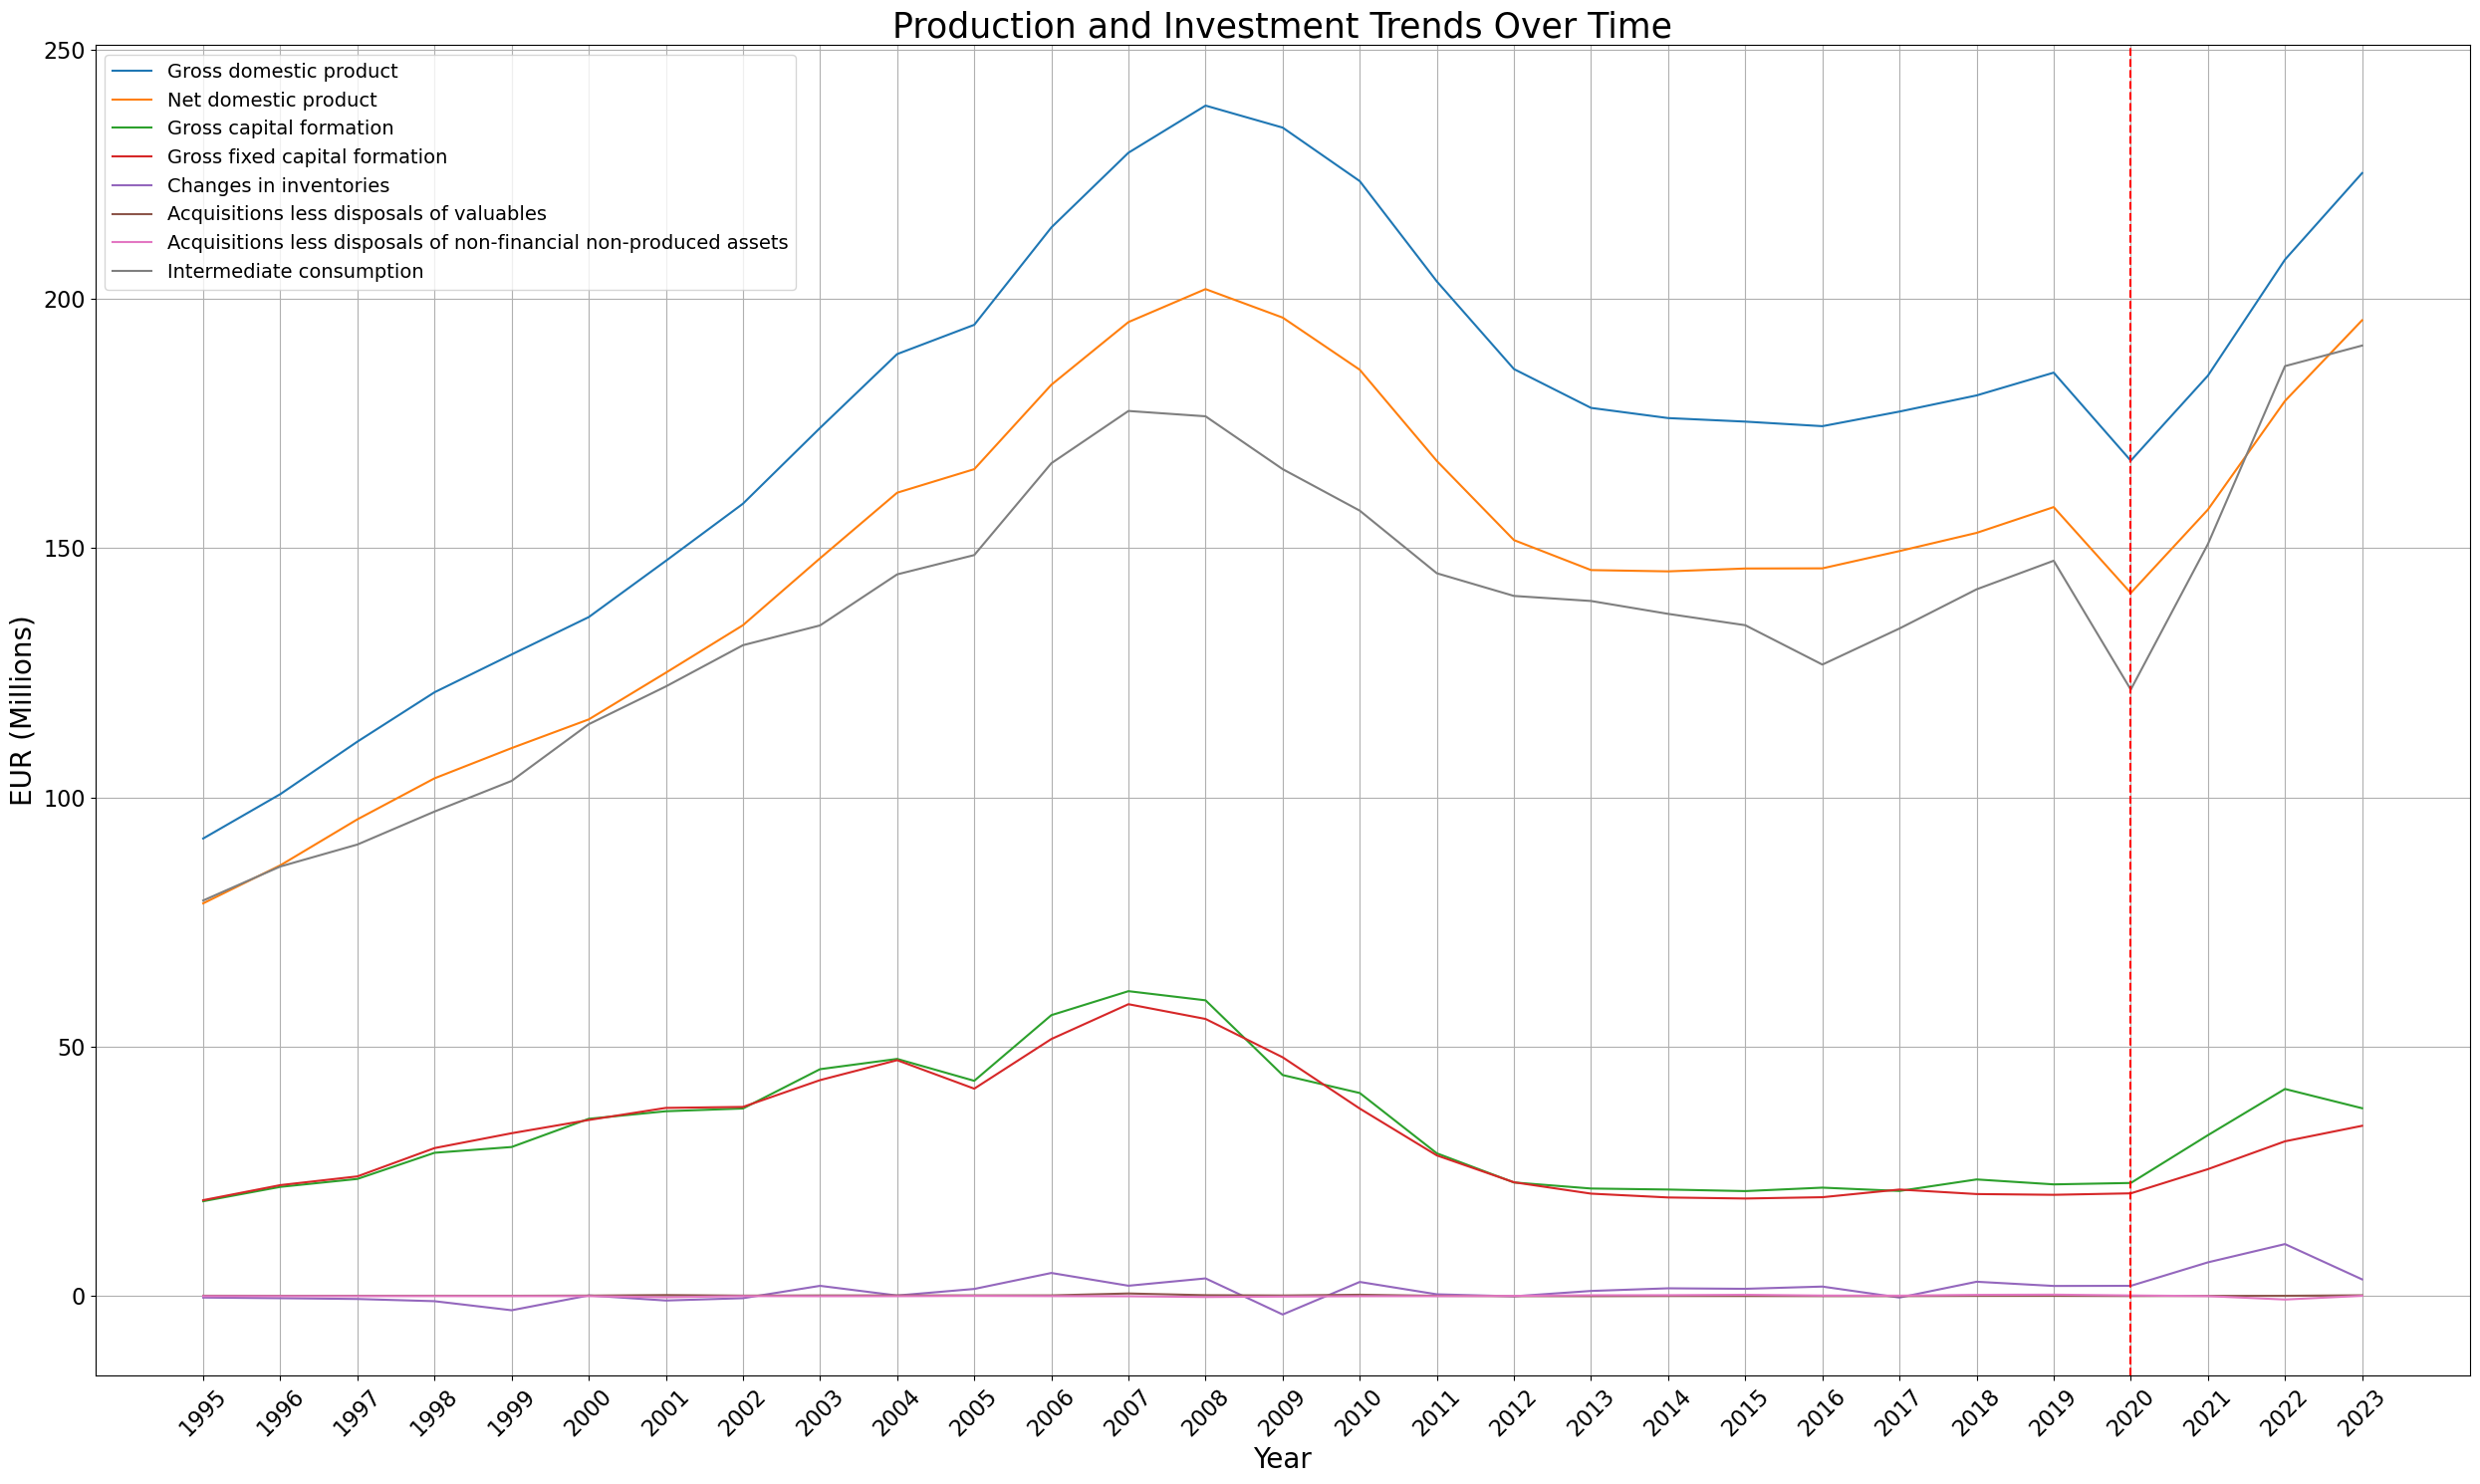

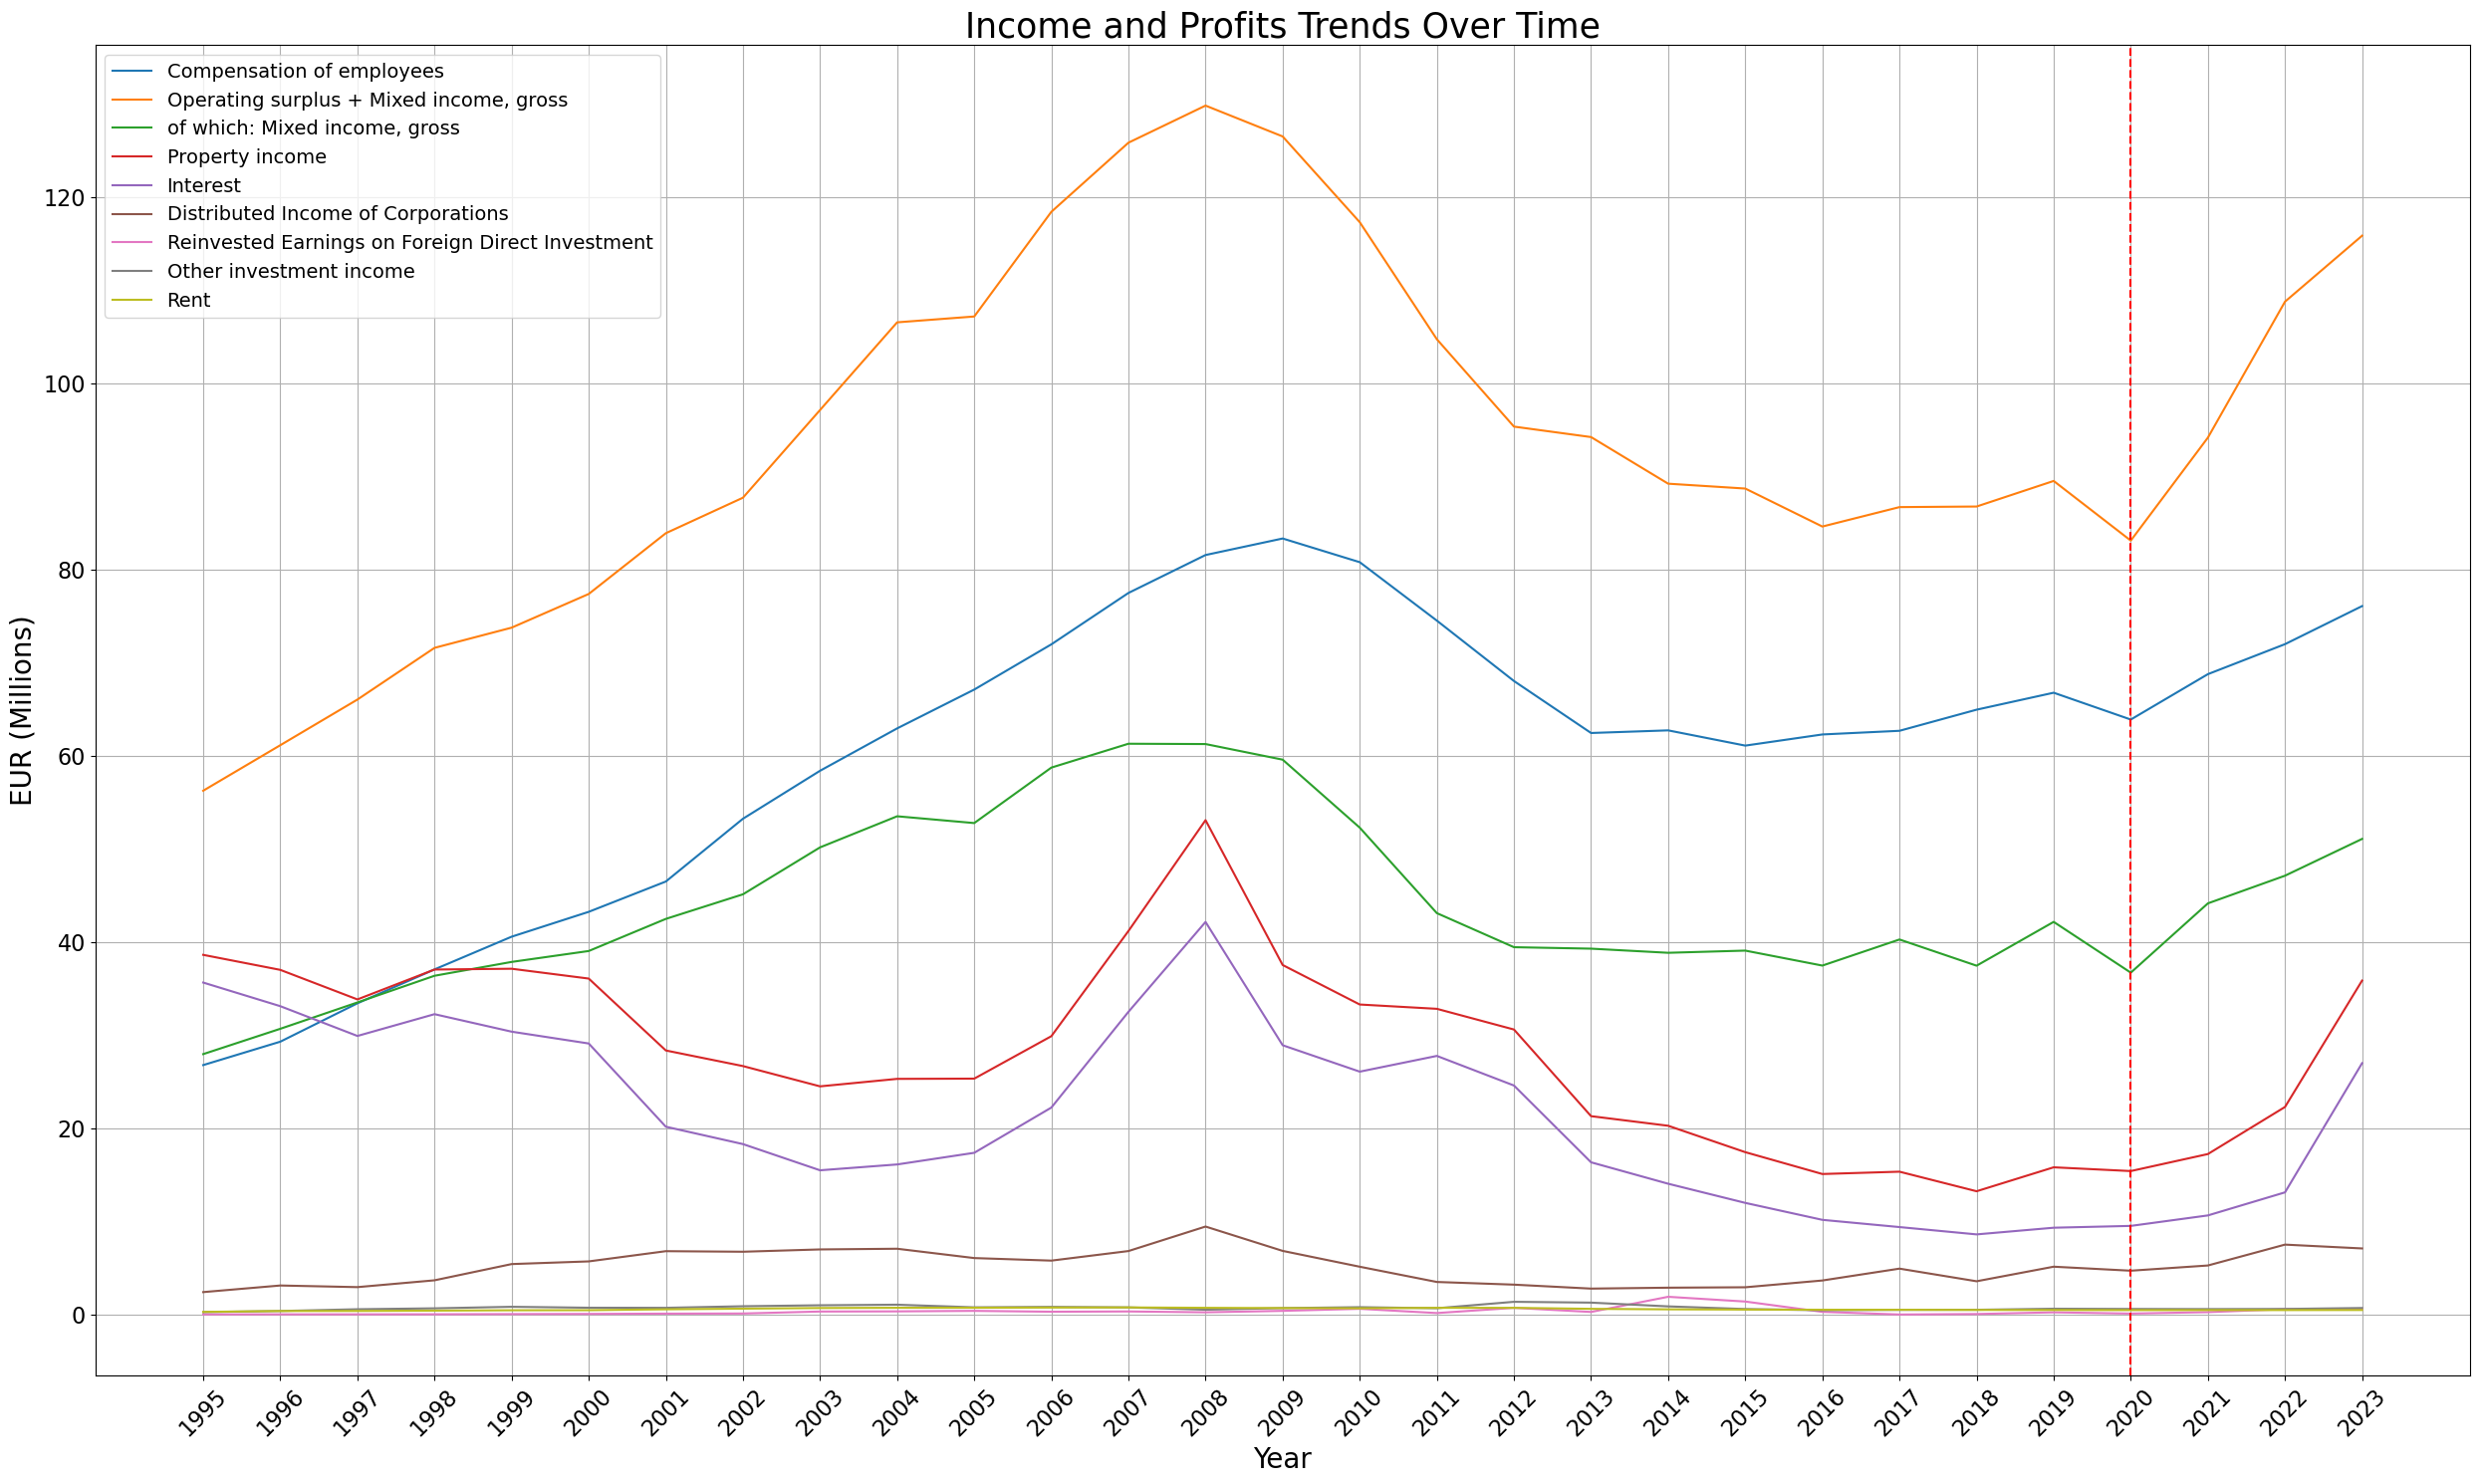

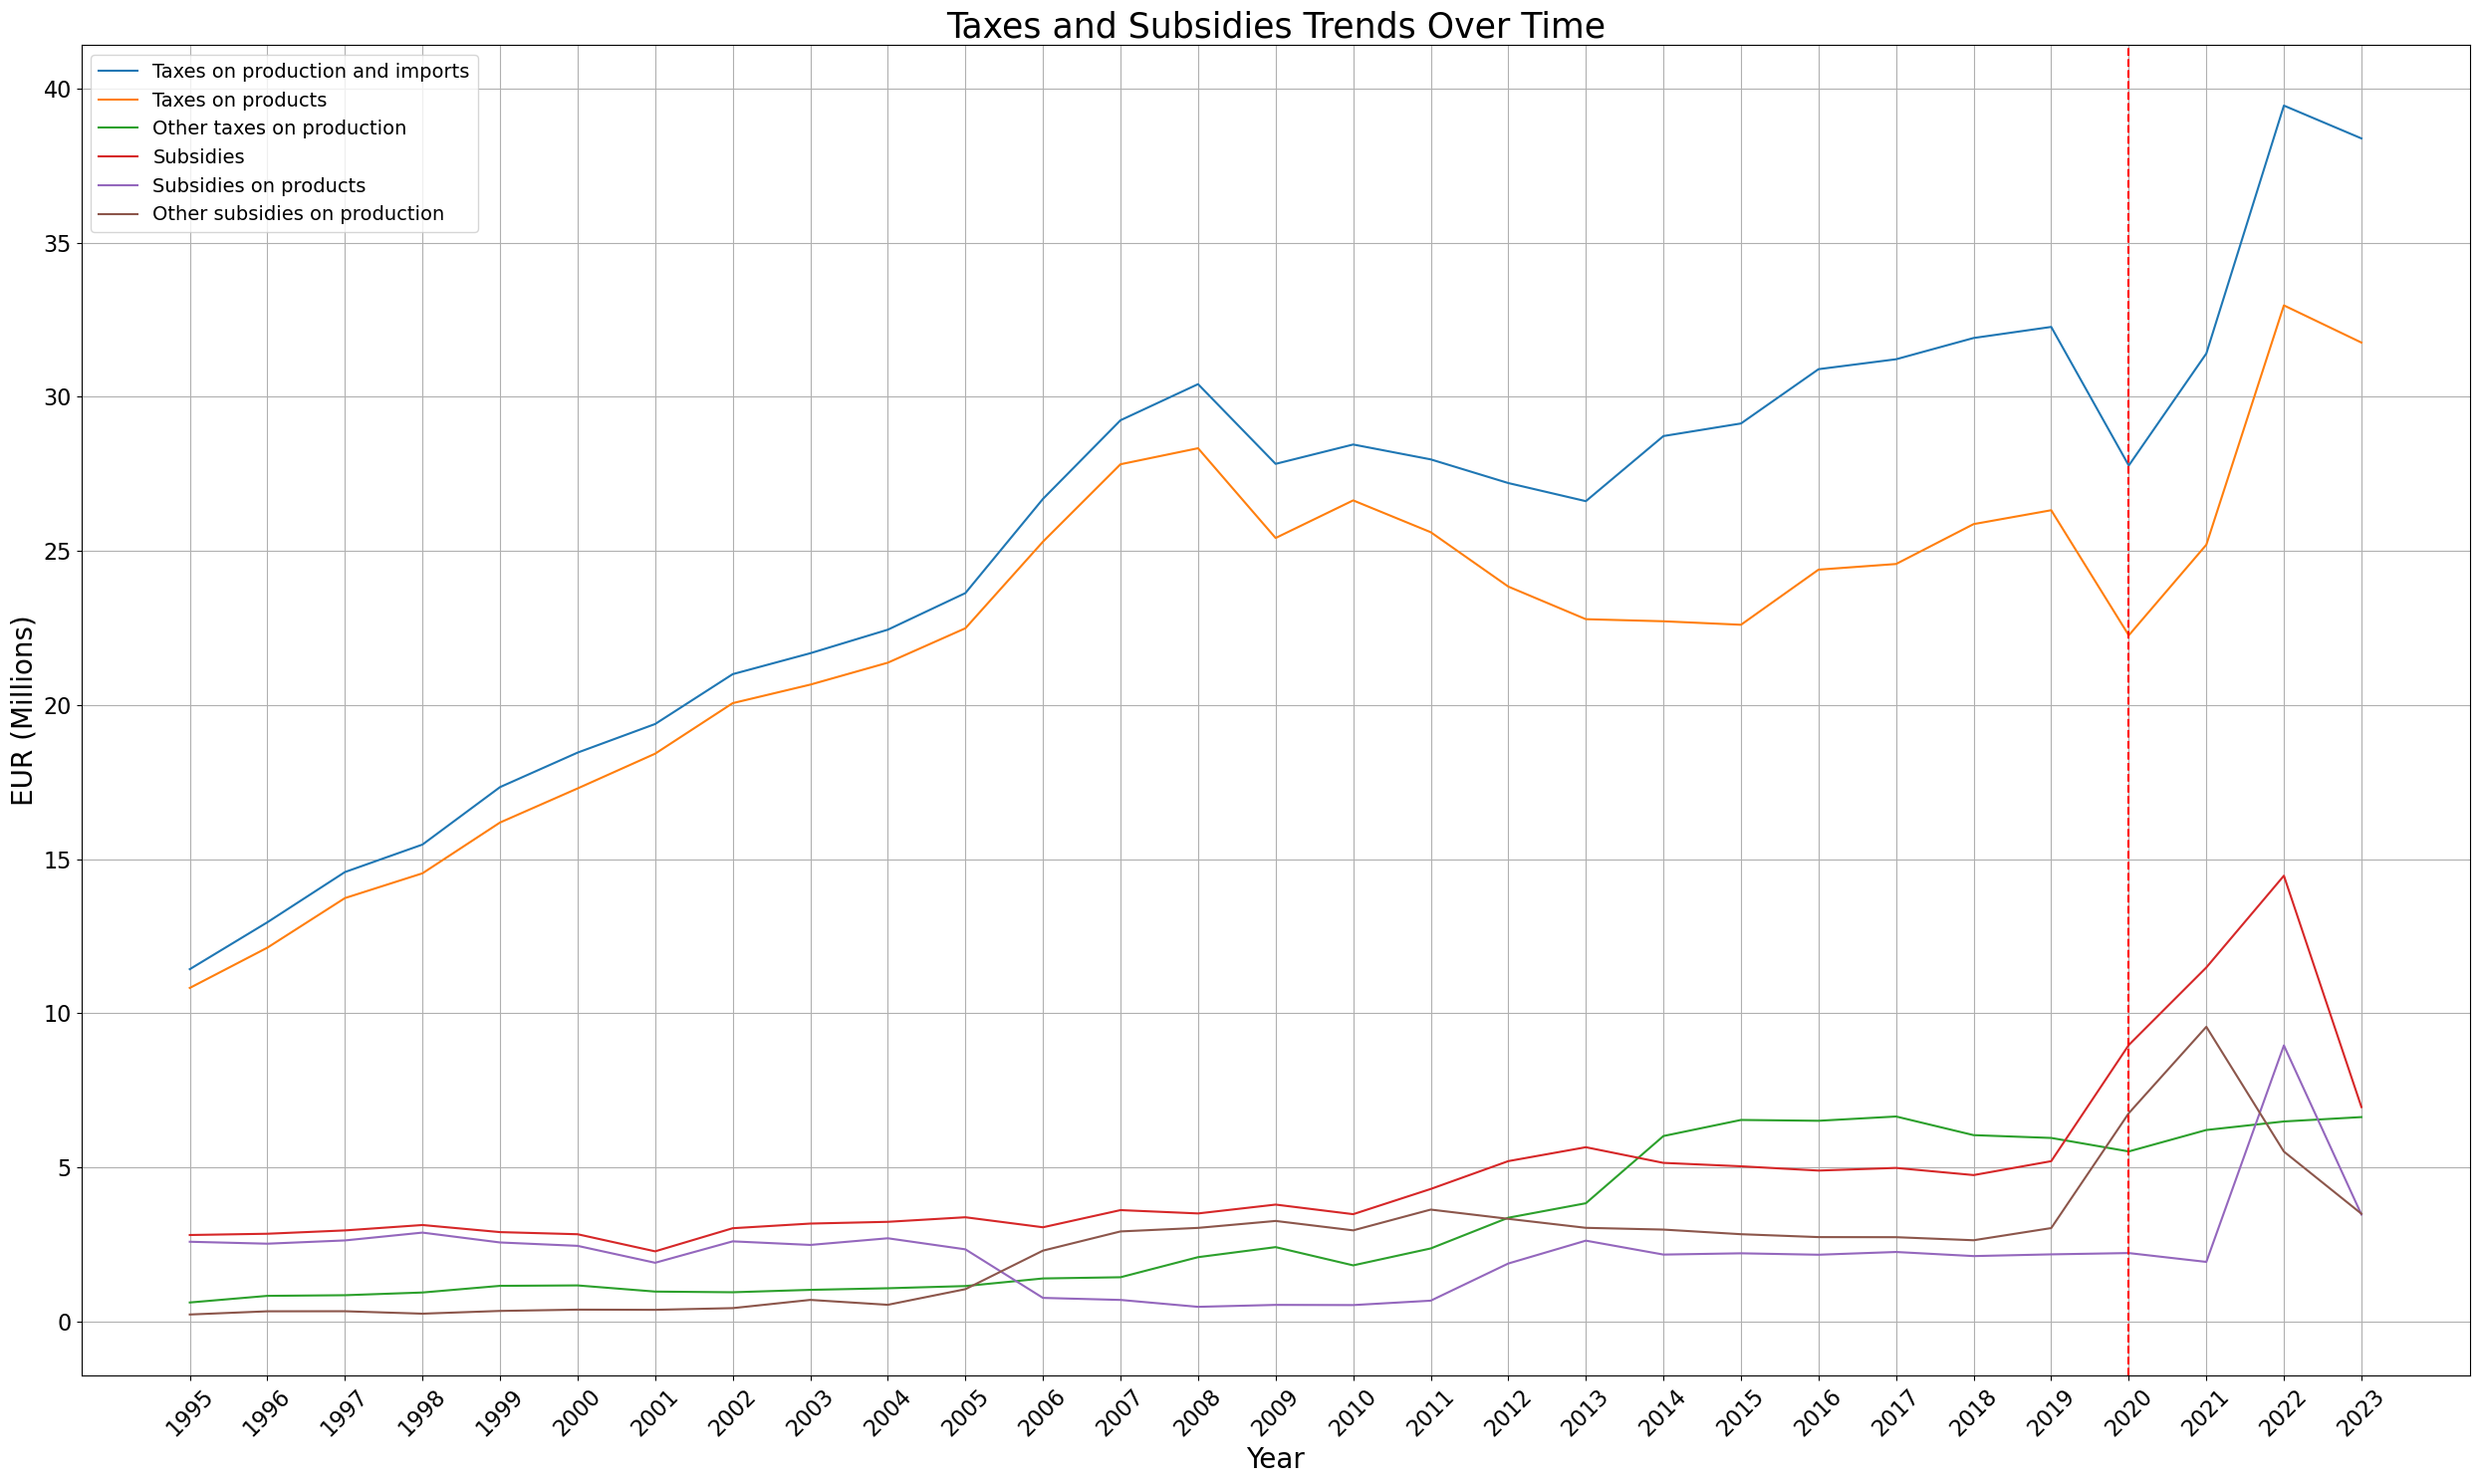

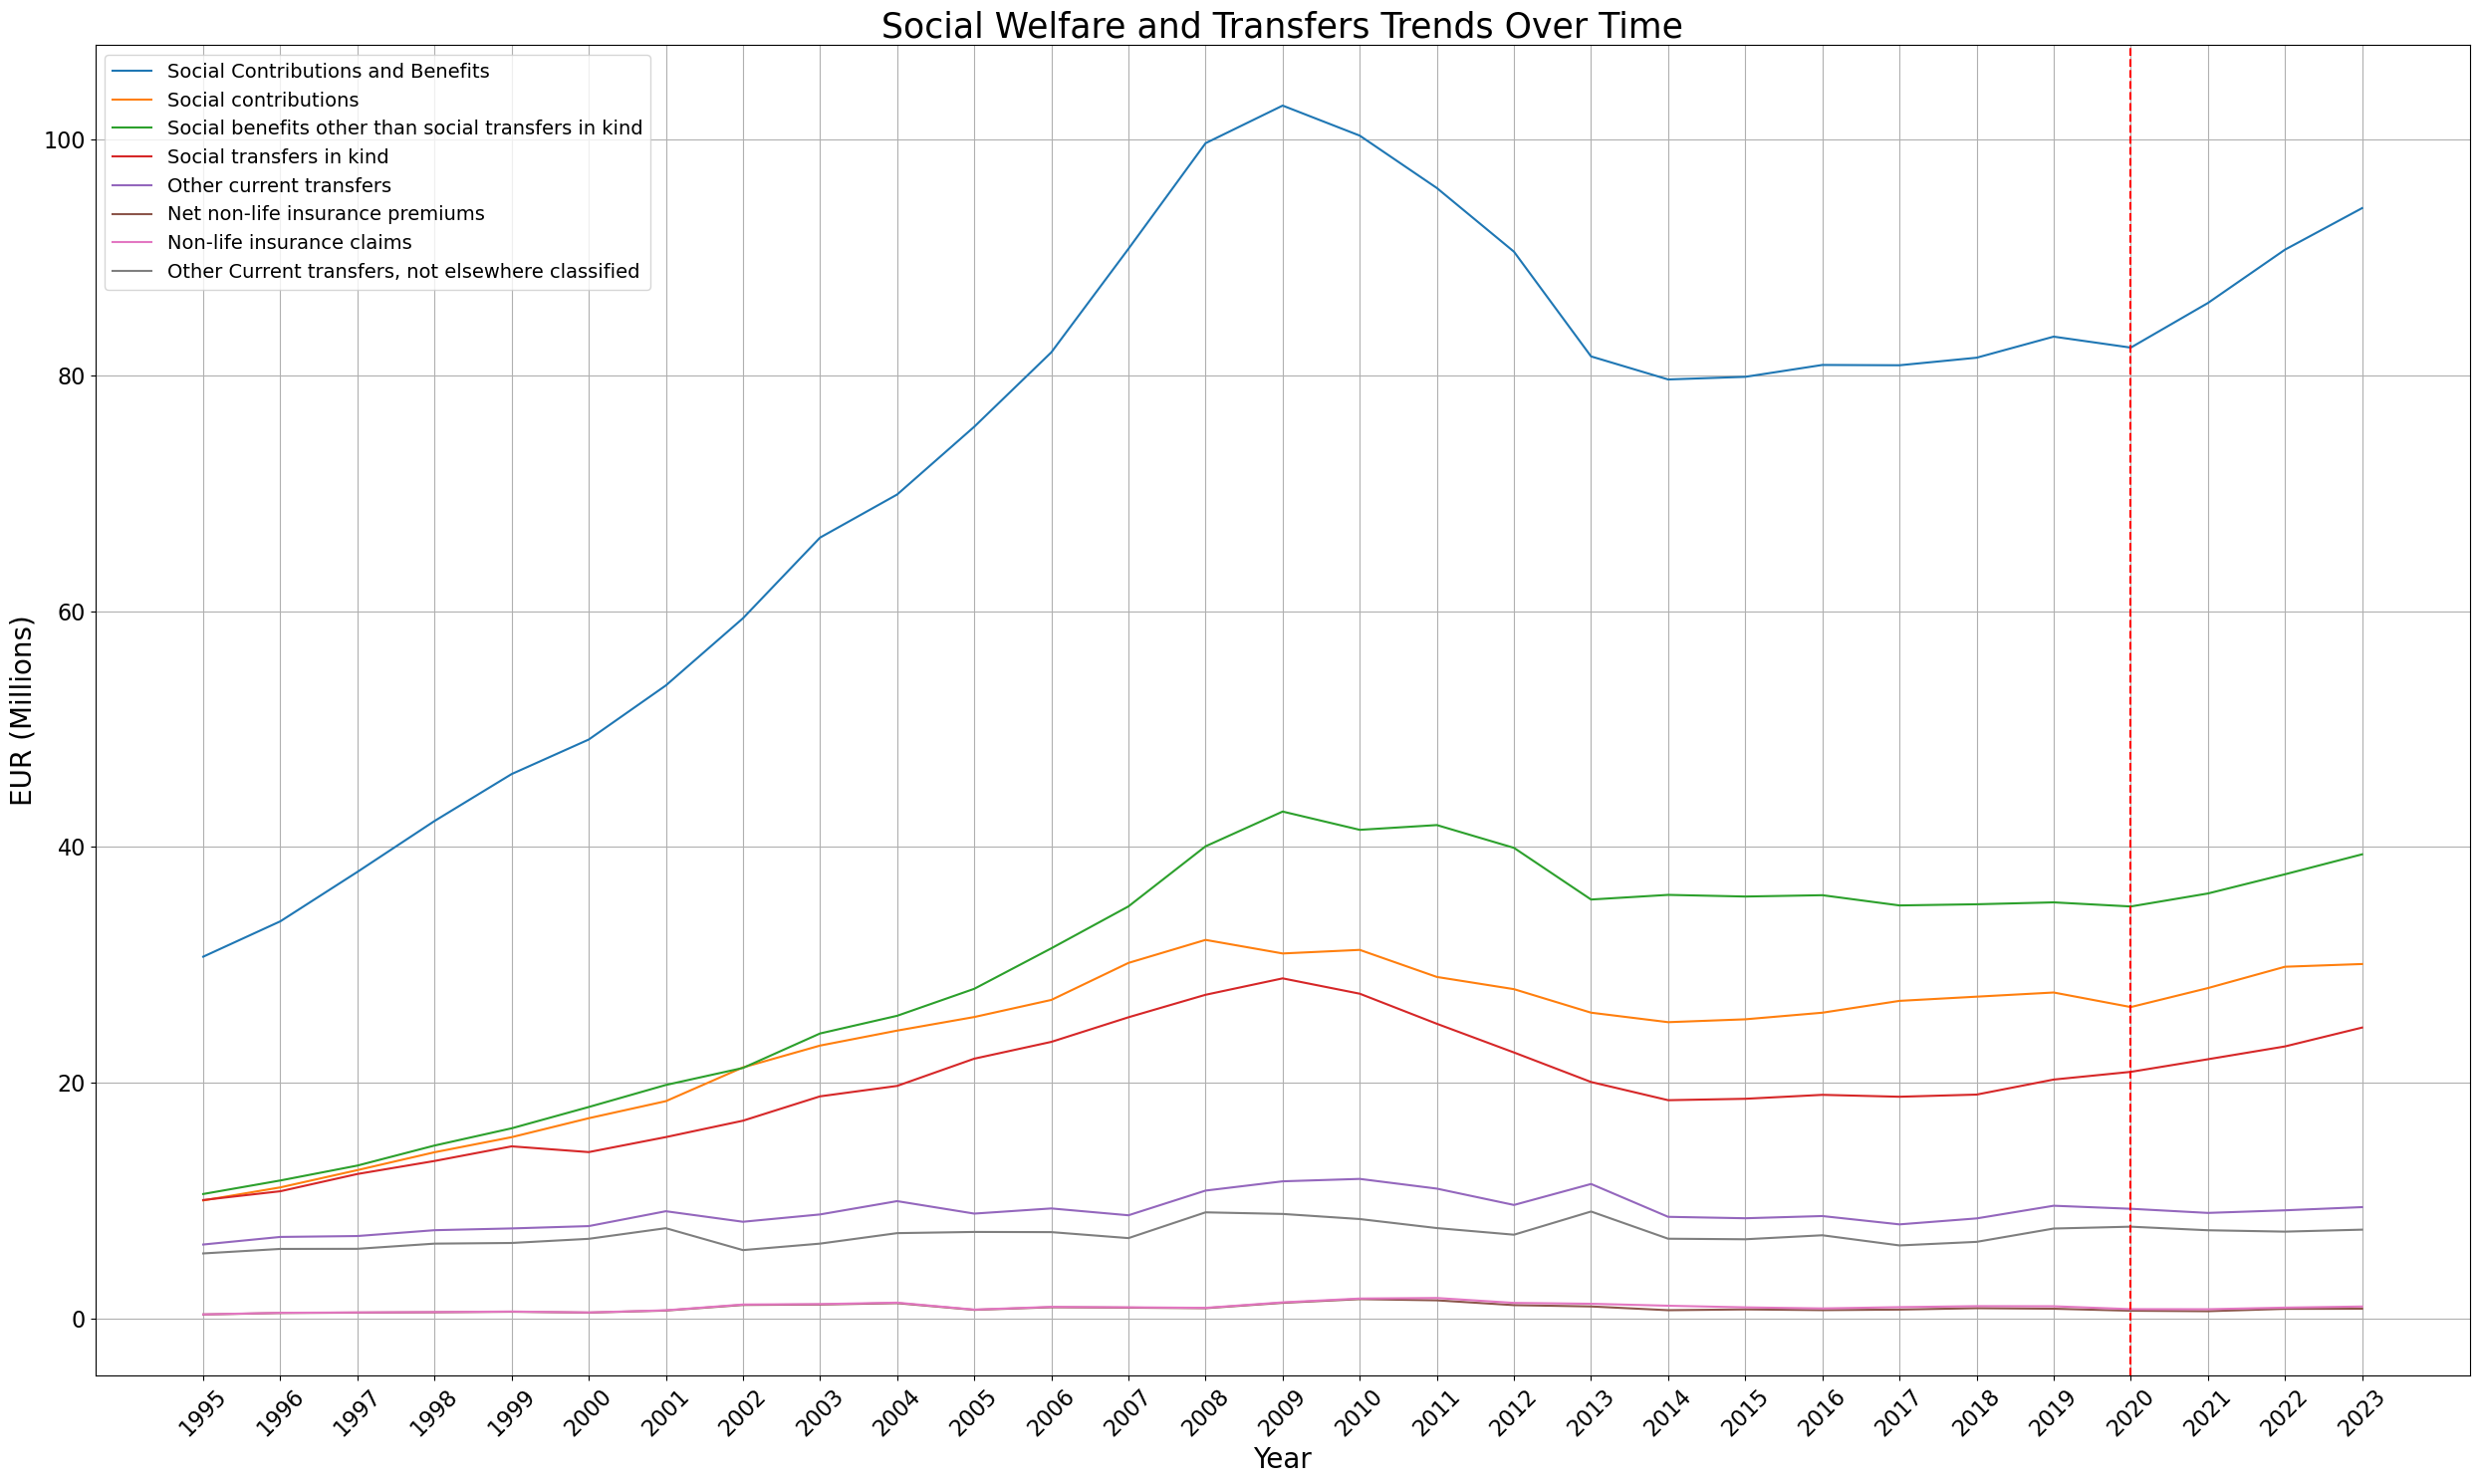

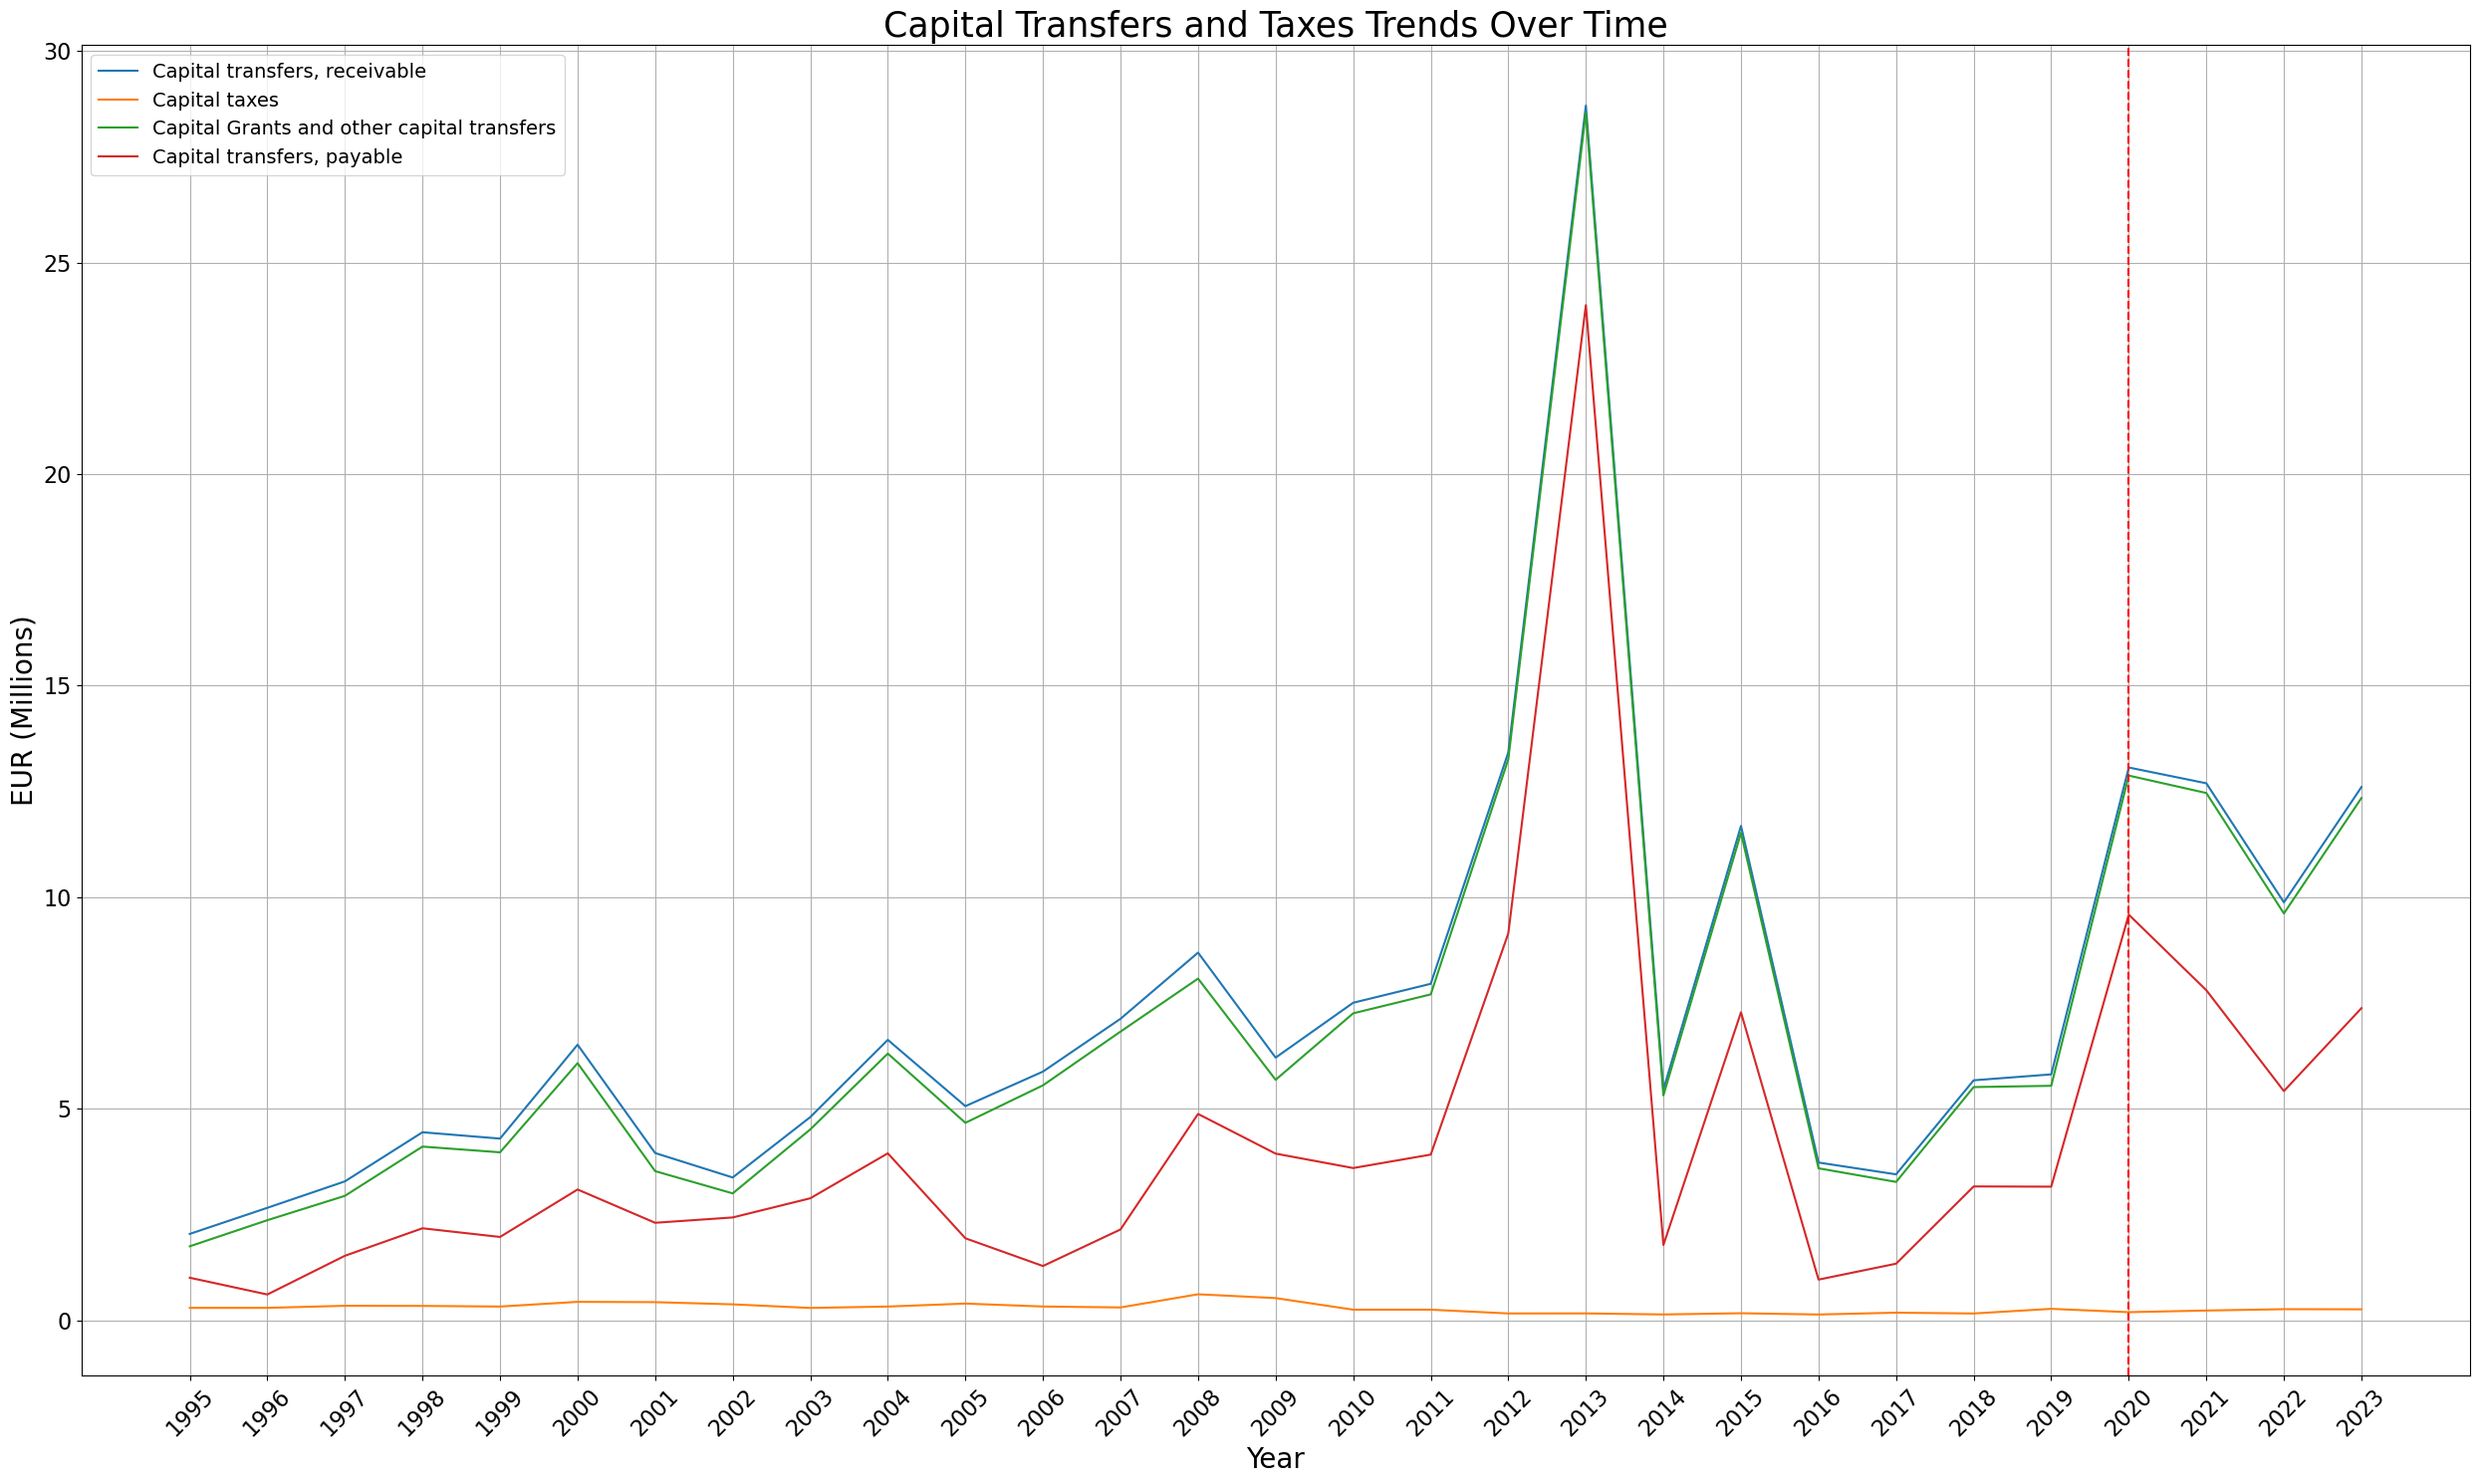

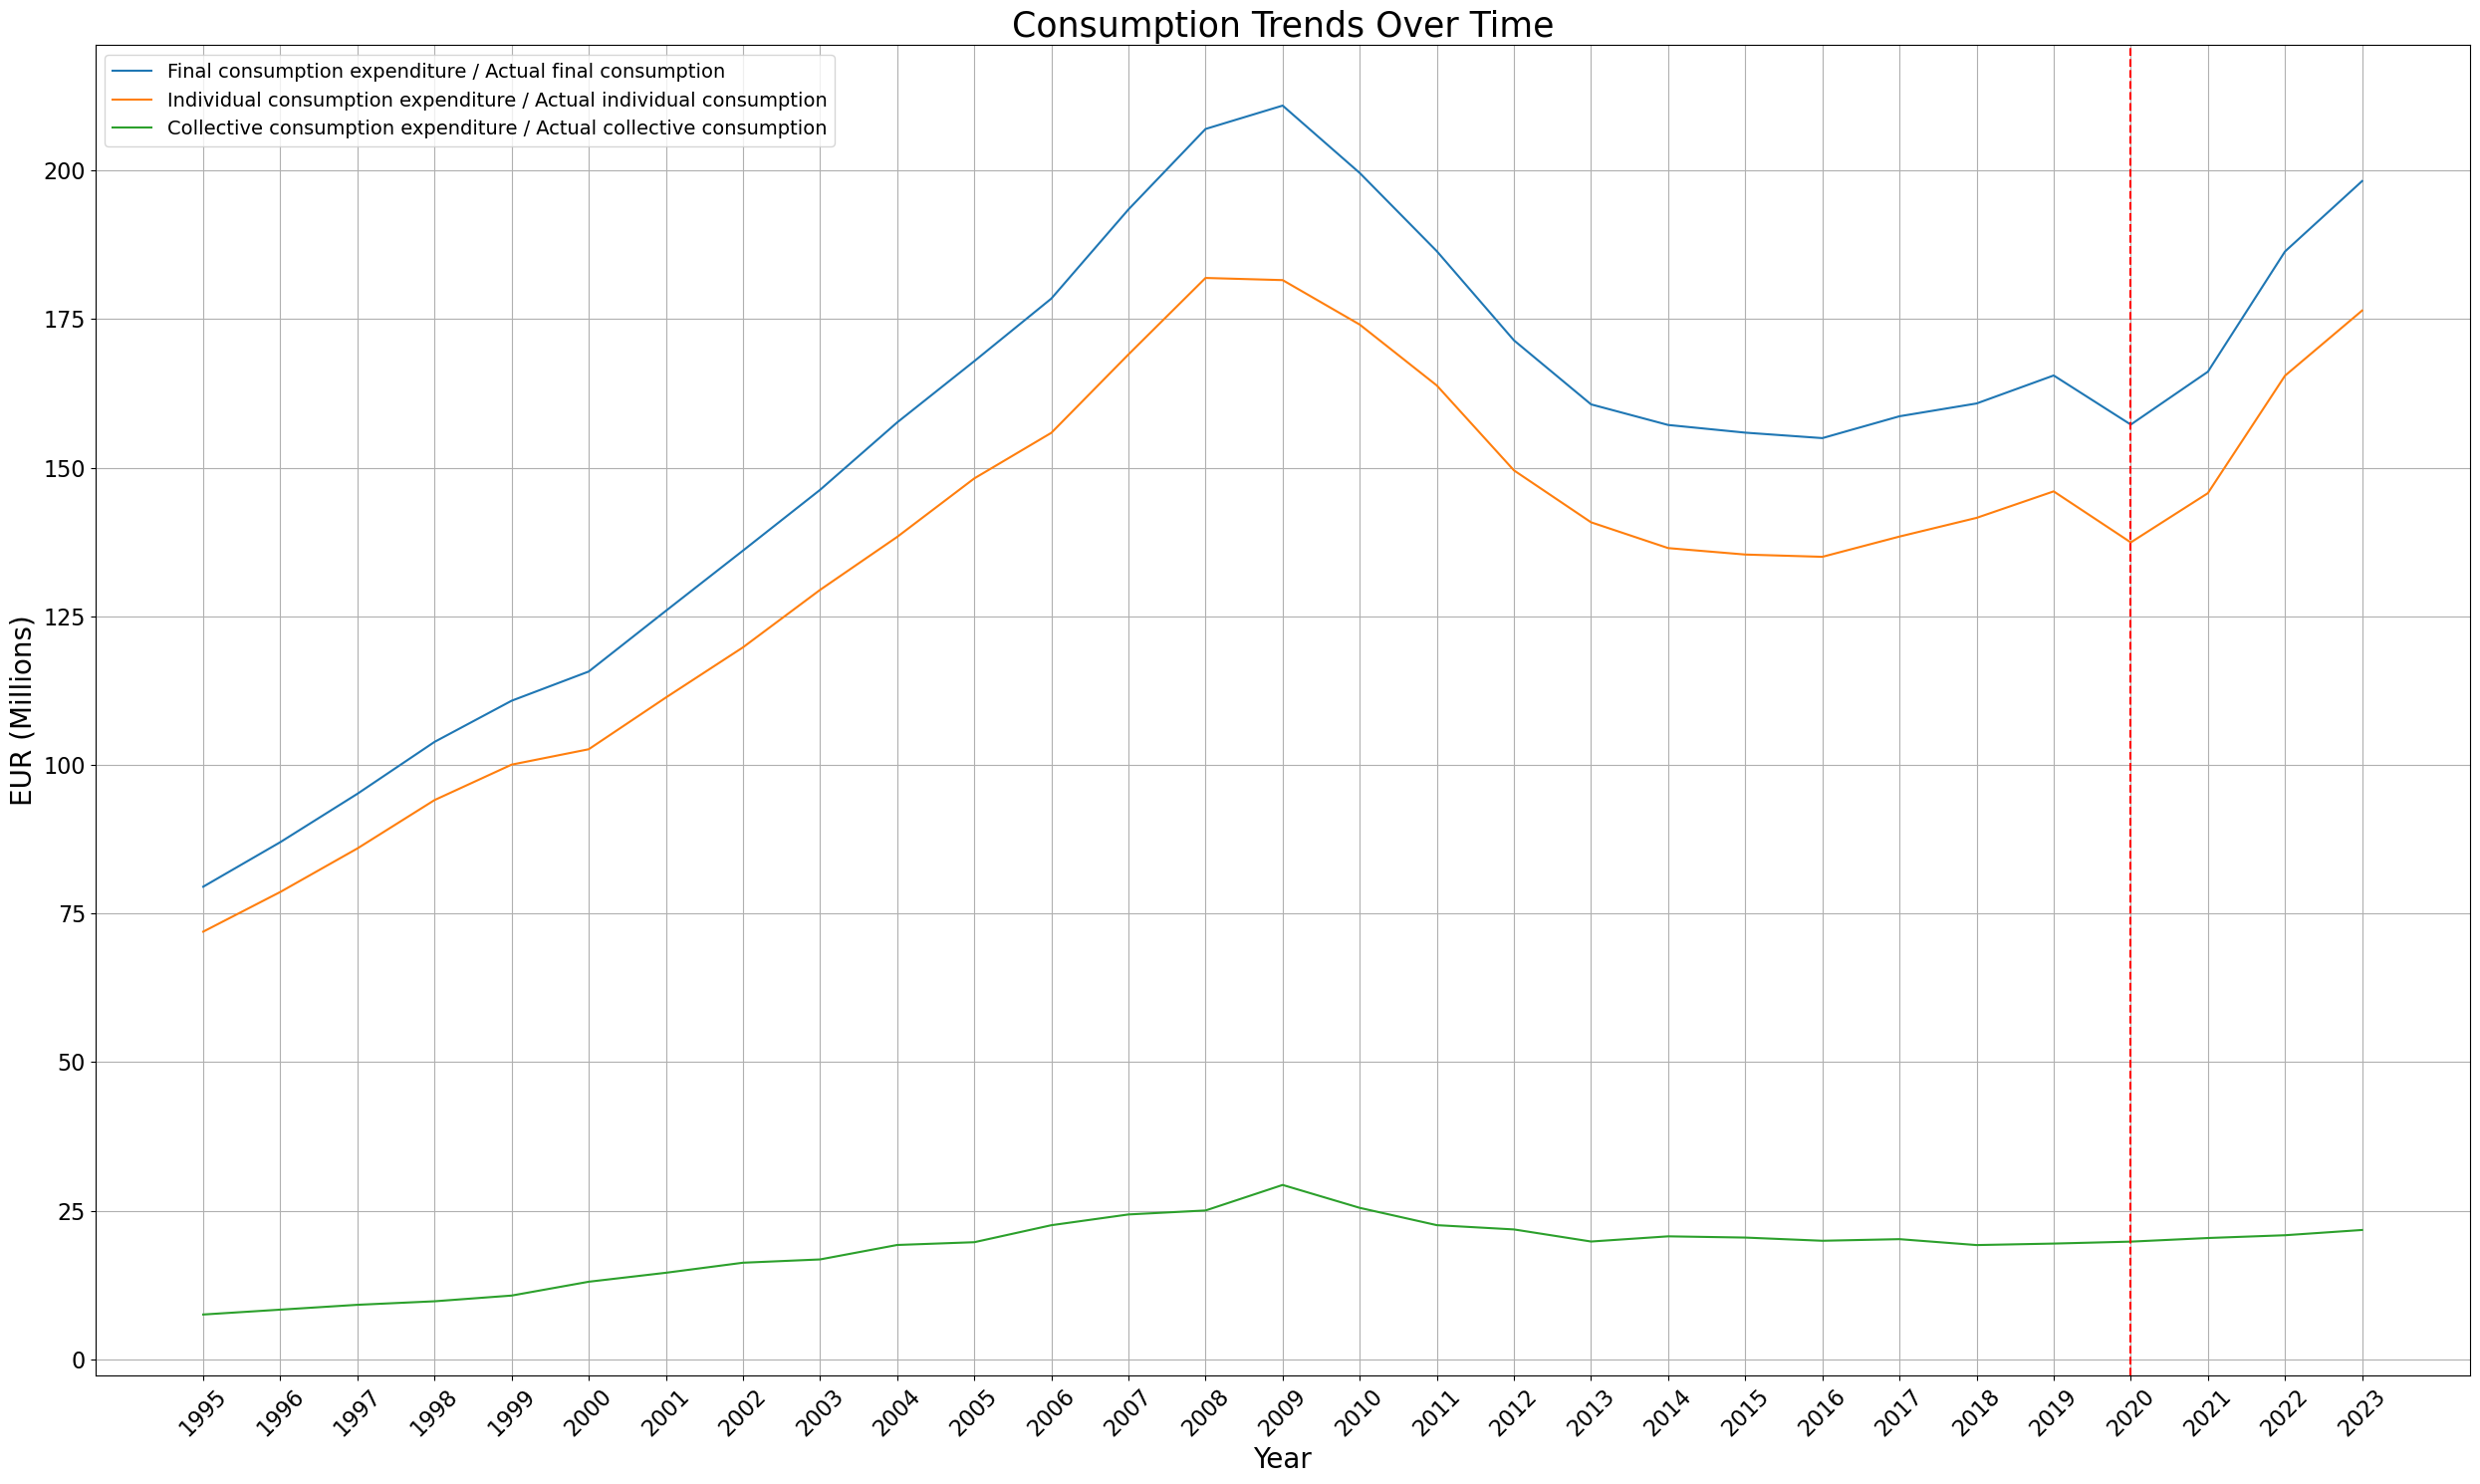

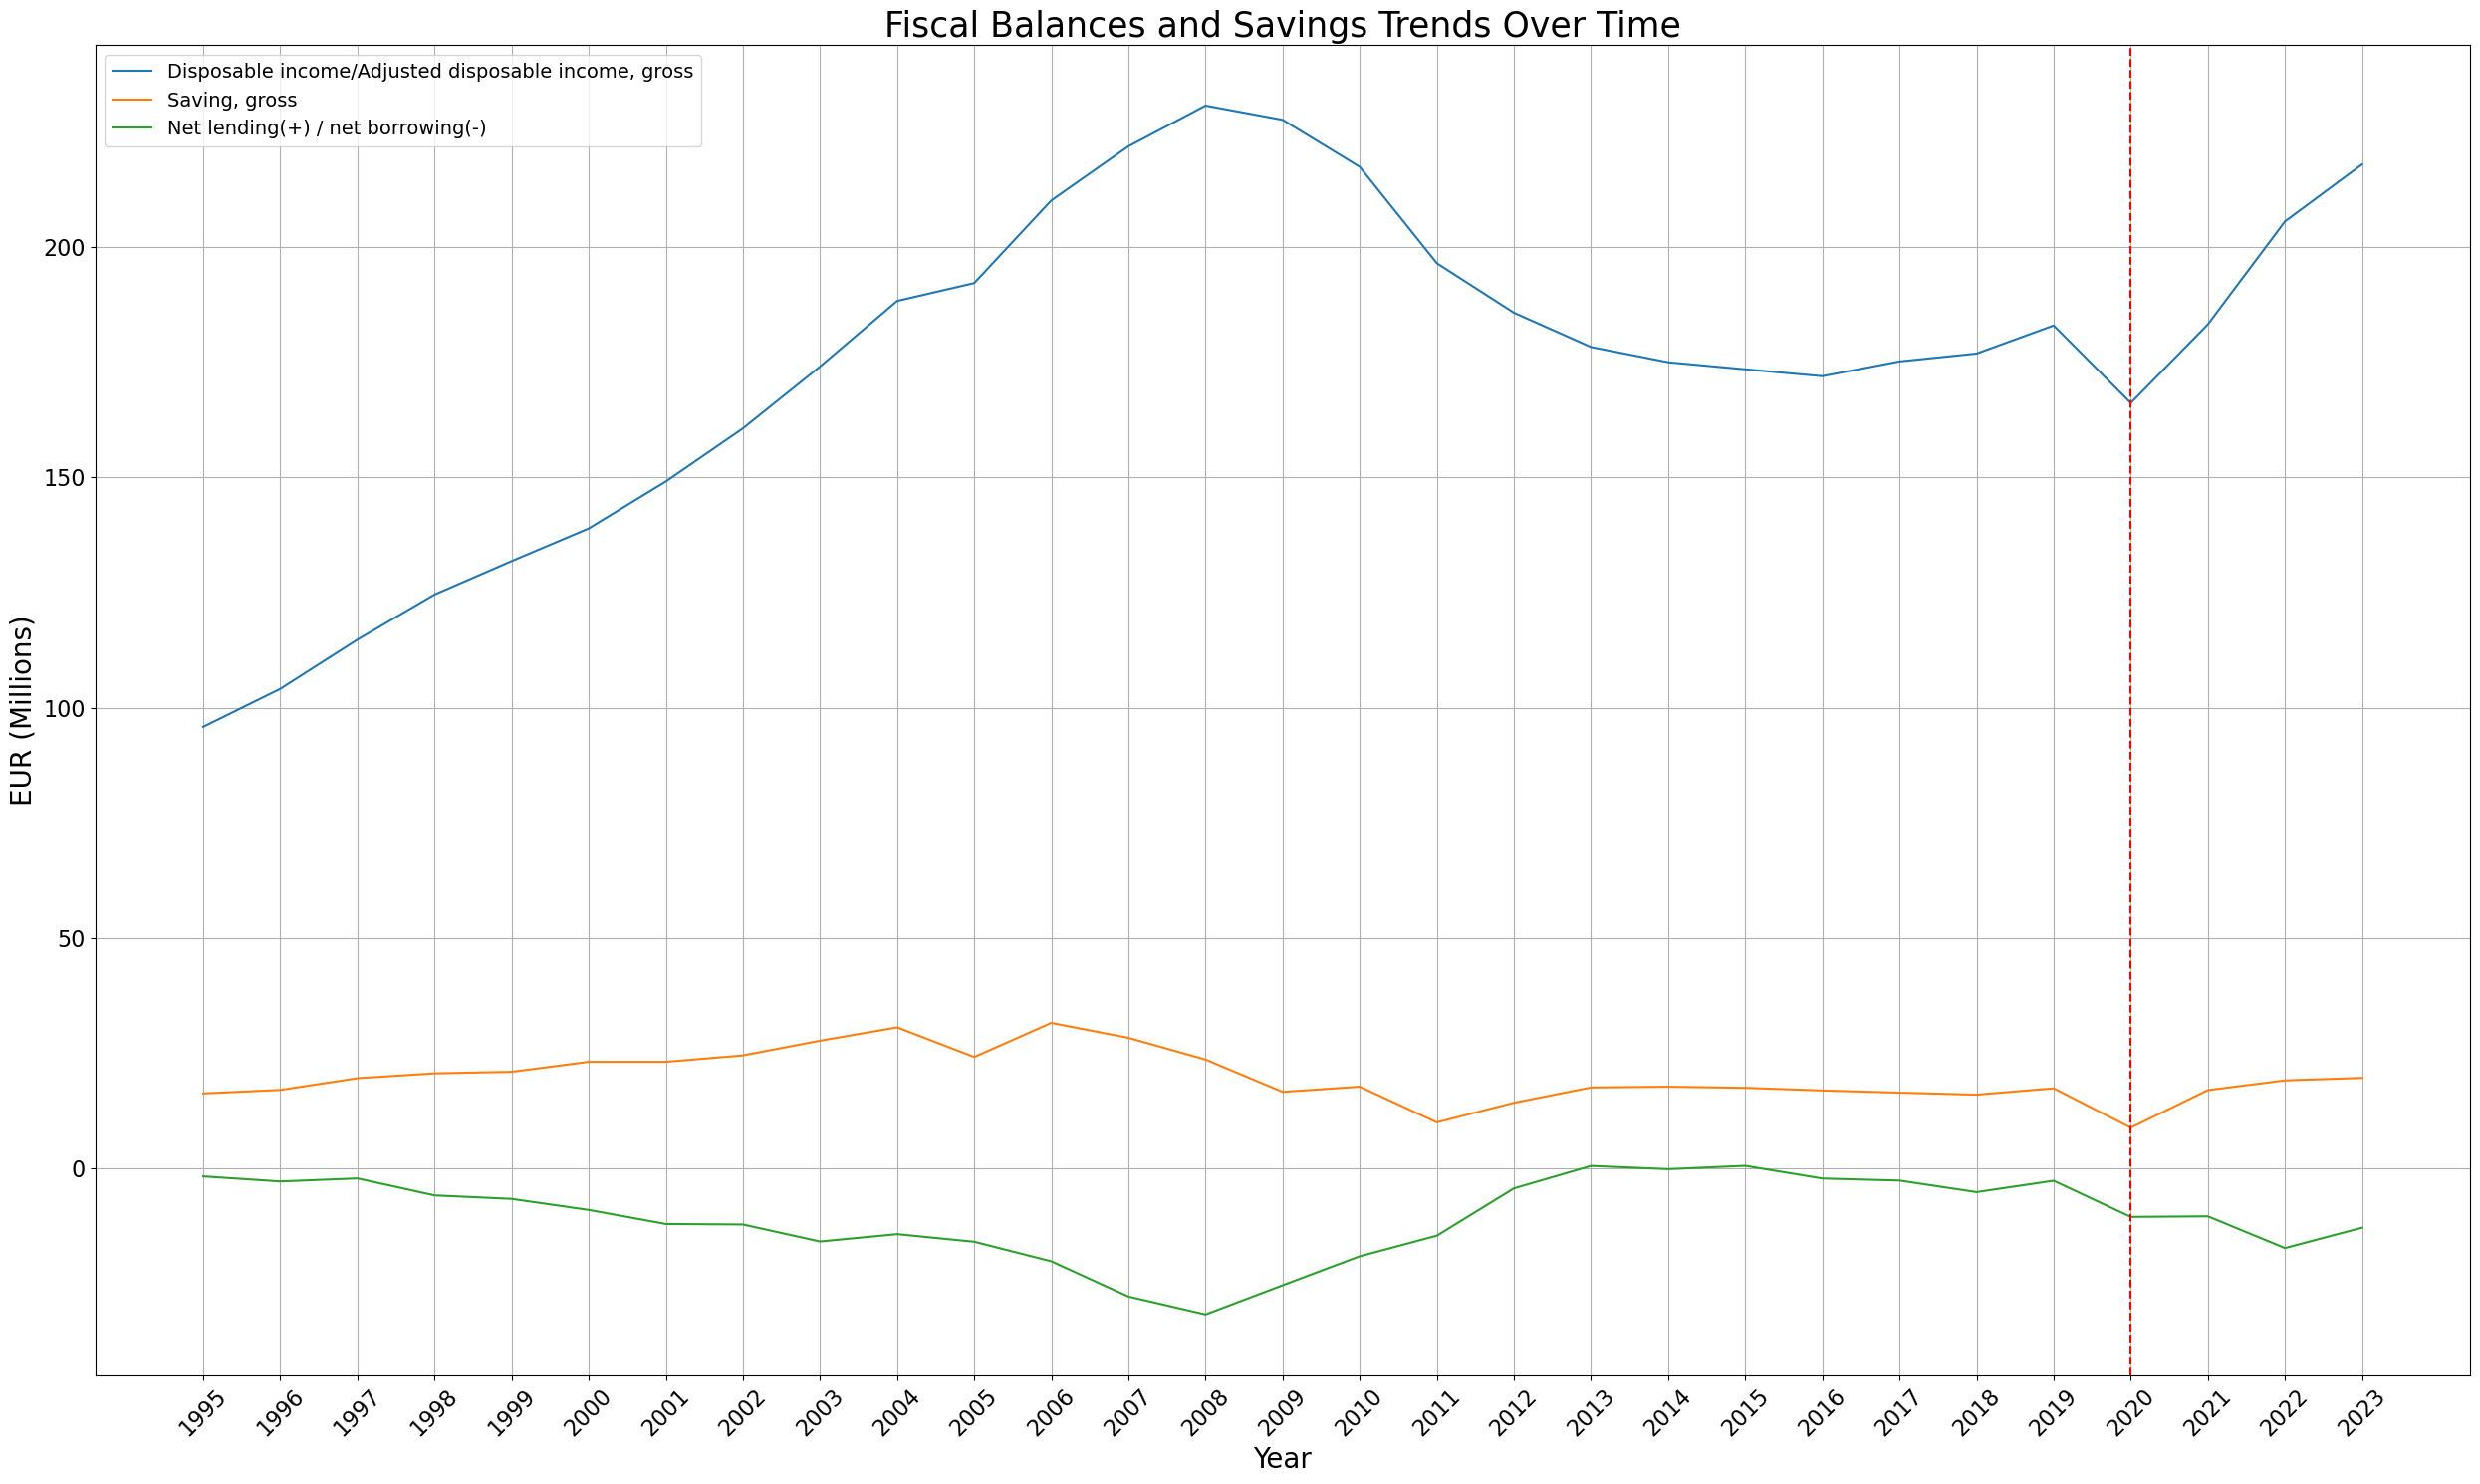

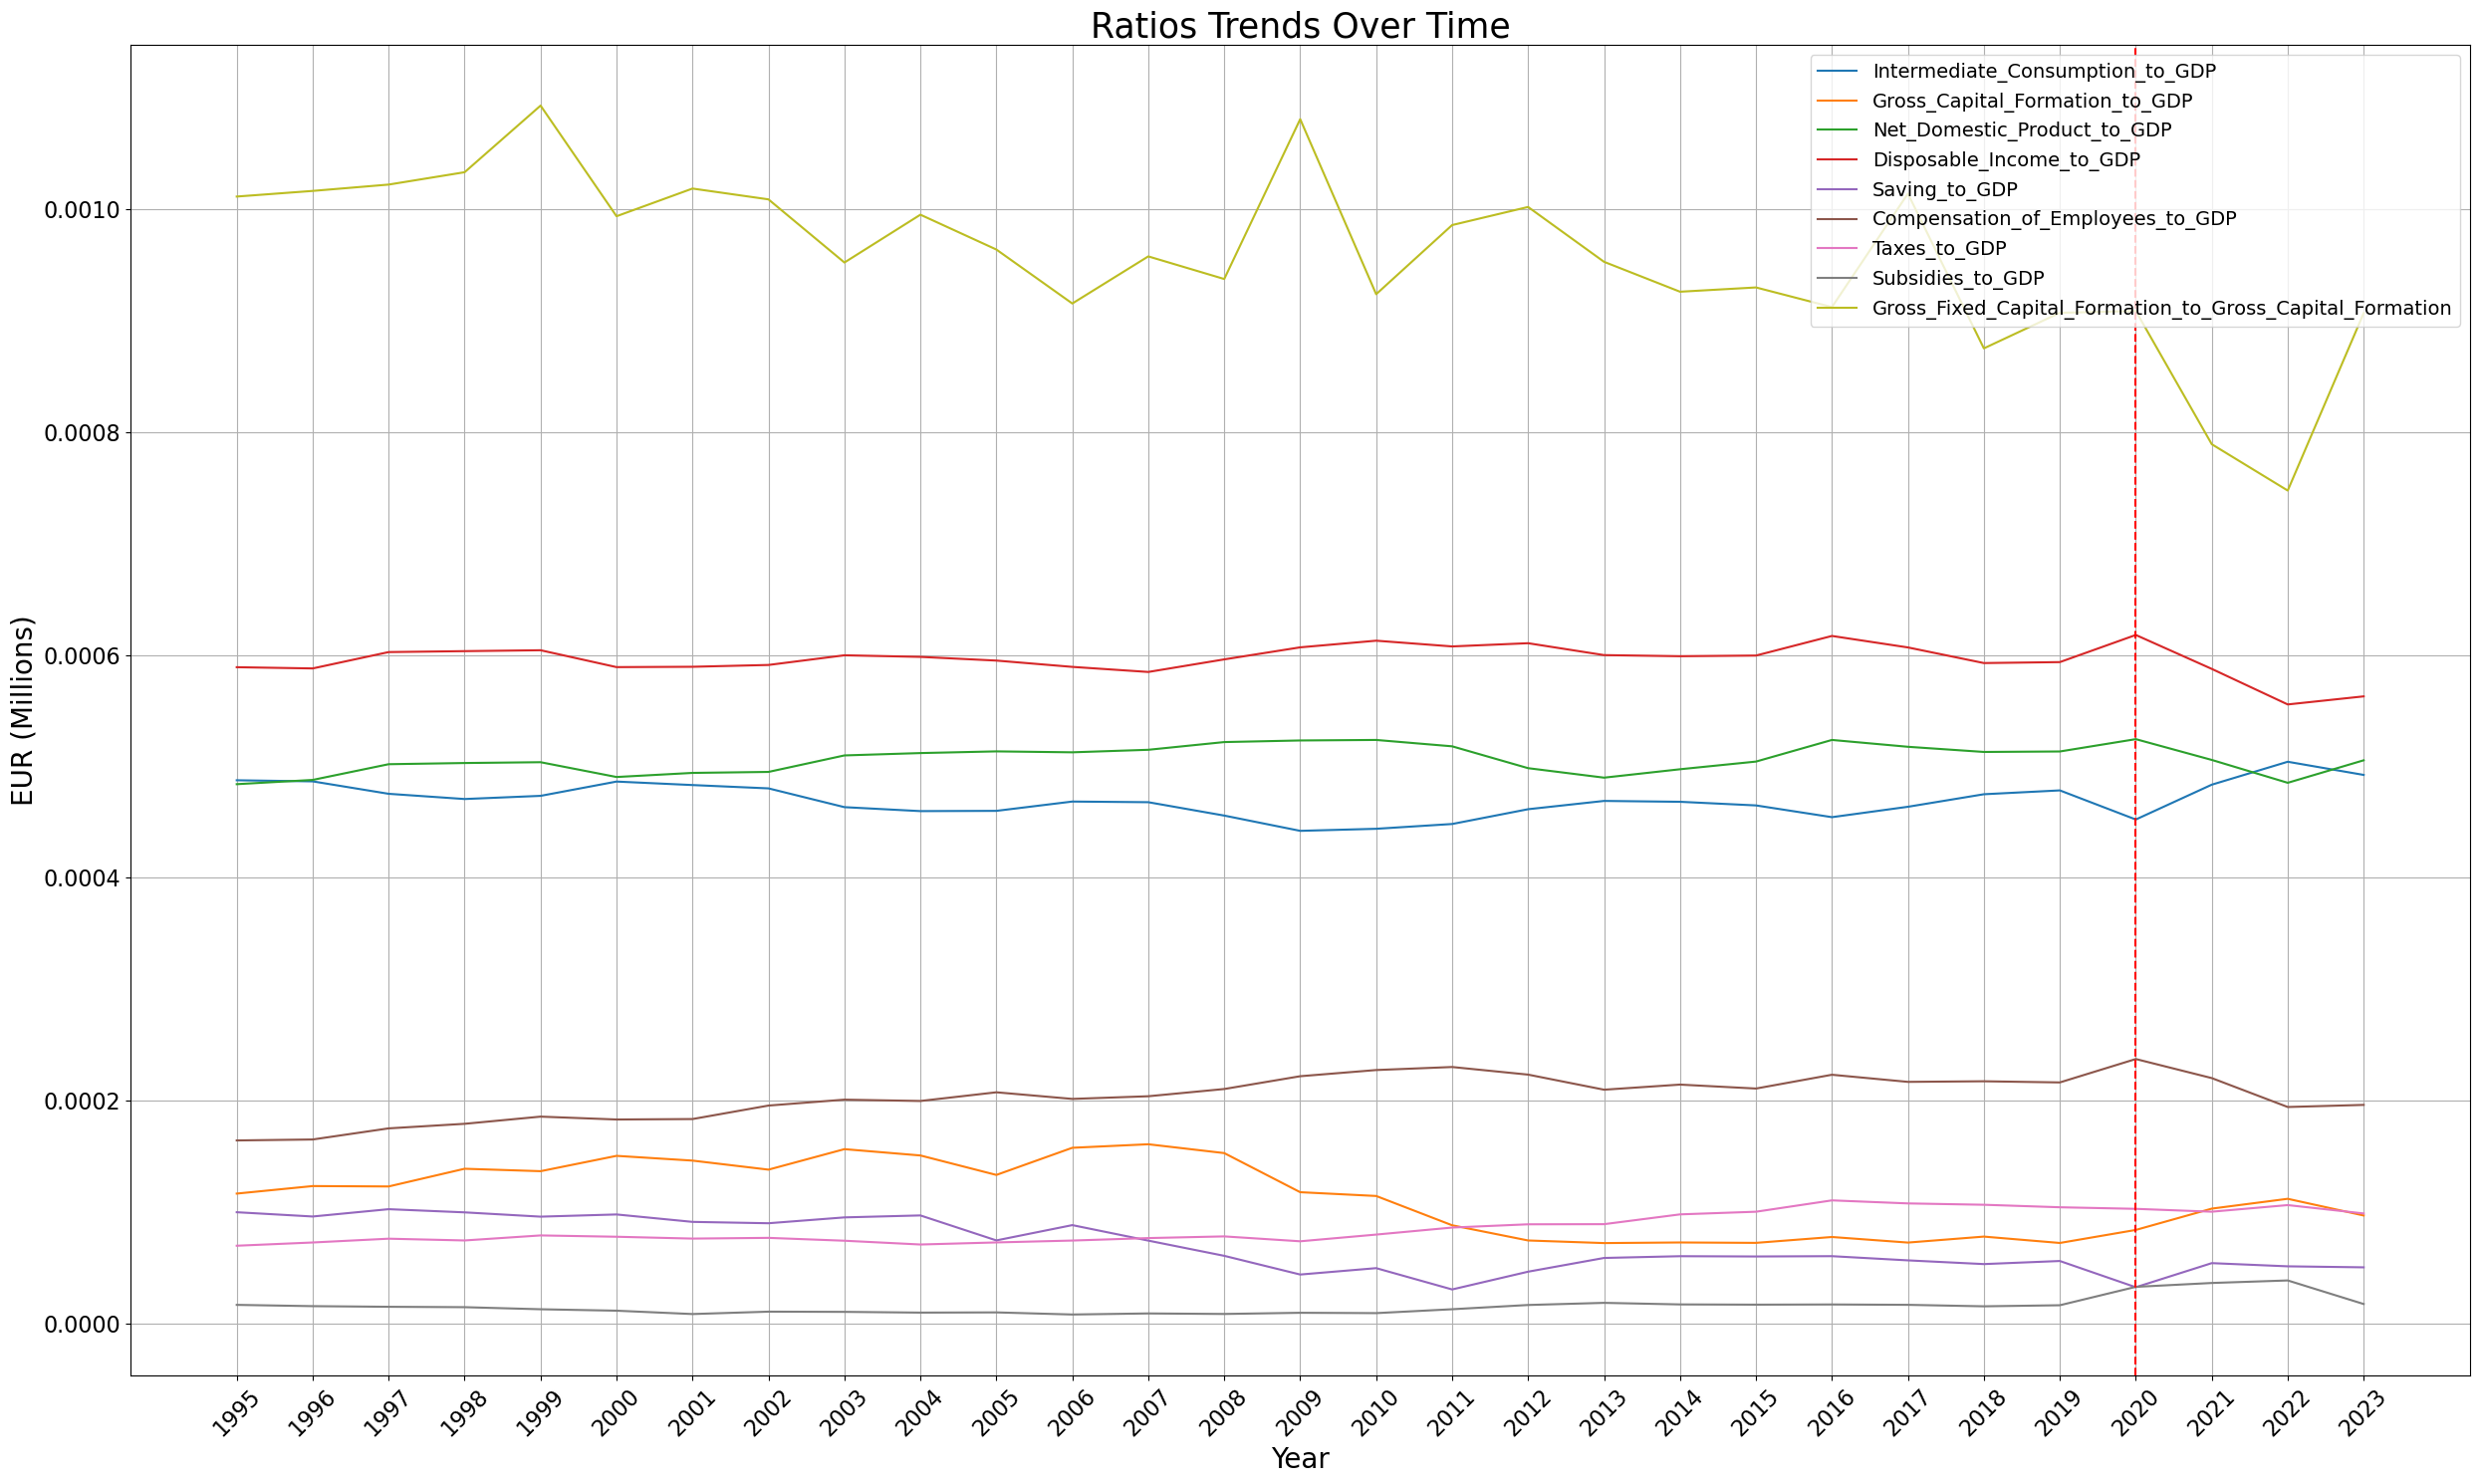

In [9]:
for category_name, sectors in categories.items():
    plot_category(data, category_name, sectors)
    plt.show()


The pandemic in 2020 marked a sharp downturn in key economic indicators, including Disposable Income to GDP, which experienced a noticeable dip as households faced reduced earnings and heightened uncertainty. Consumption trends also mirrored this disruption, with Final Consumption Expenditure and Individual Consumption Expenditure showing significant declines as consumer spending plummeted during lockdowns and economic restrictions. However, Collective Consumption Expenditure remained stable, highlighting the continuity of government-provided services even during the crisis.

The post-2020 period reveals signs of economic recovery and resilience. Savings to GDP exhibited a marked increase, reflecting a shift toward precautionary savings as households and businesses adjusted to uncertain conditions. This increase in savings, coupled with improvements in the Net Lending/Net Borrowing ratio, suggests more cautious financial behavior, with a focus on reducing liabilities and strengthening financial stability. Meanwhile, Compensation of Employees to GDP gradually recovered from its dip, signaling improvements in employment levels and wages, though the pace of recovery varied across sectors. Investment trends, as captured by Gross Capital Formation to GDP, showed early signs of rebound, but levels remained below pre-pandemic highs, reflecting lingering caution in long-term capital allocation.

The stability in Gross Fixed Capital Formation to Gross Capital Formation indicates consistent proportions of investment despite the crisis, while the gradual recovery of Taxes to GDP demonstrates a return of economic activity as businesses reopened and incomes stabilized. These trends collectively indicate that while the pandemic severely disrupted income, consumption, and investment in 2020, the period from 2021 to 2023 was characterized by gradual recovery. Households and businesses adjusted their financial behaviors, prioritizing savings and cautious investments, while governments maintained stable collective consumption and supported economic resilience. By 2023, many indicators began approaching pre-pandemic levels, reflecting the effectiveness of recovery efforts and the economy's ability to adapt to unprecedented challenges.
